### **`[Problem 1] Share and execute the official tutorial model`**

---

- We have used the time series forecasting using Recurrent Neural Networks (RNN), From the Tensoflow official tutorial models.
> https://www.tensorflow.org/tutorials/structured_data/time_series



In [ ]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [ ]:
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [ ]:
TRAIN_SPLIT = 300000

In [ ]:
tf.random.set_seed(13)

- On the first PART the univariate time series is forecasted

In [ ]:
uni_data = df['T (degC)']
uni_data.index = df['Date Time']
uni_data.head()

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64

array([<Axes: xlabel='Date Time'>], dtype=object)

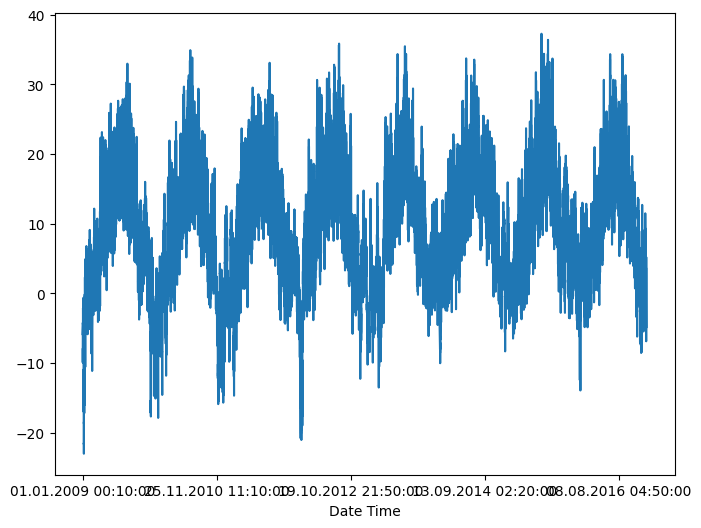

In [ ]:
uni_data.plot(subplots=True)

- The above is how the data looks across time

In [ ]:
uni_data = uni_data.values

In [ ]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [ ]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [ ]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [ ]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[-1.99766294]
 [-2.04281897]
 [-2.05439744]
 [-2.0312405 ]
 [-2.02660912]
 [-2.00113649]
 [-1.95134907]
 [-1.95134907]
 [-1.98492663]
 [-2.04513467]
 [-2.08334362]
 [-2.09723778]
 [-2.09376424]
 [-2.09144854]
 [-2.07176515]
 [-2.07176515]
 [-2.07639653]
 [-2.08913285]
 [-2.09260639]
 [-2.10418486]]

 Target temperature to predict
-2.1041848598100876


In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

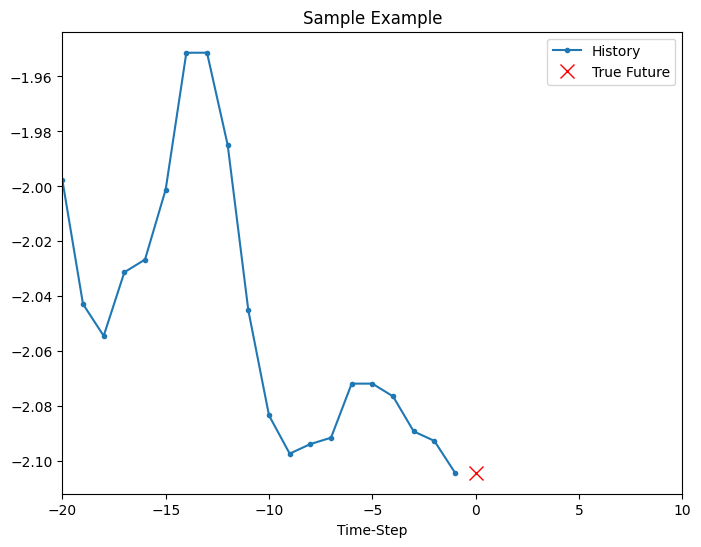

In [ ]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [ ]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

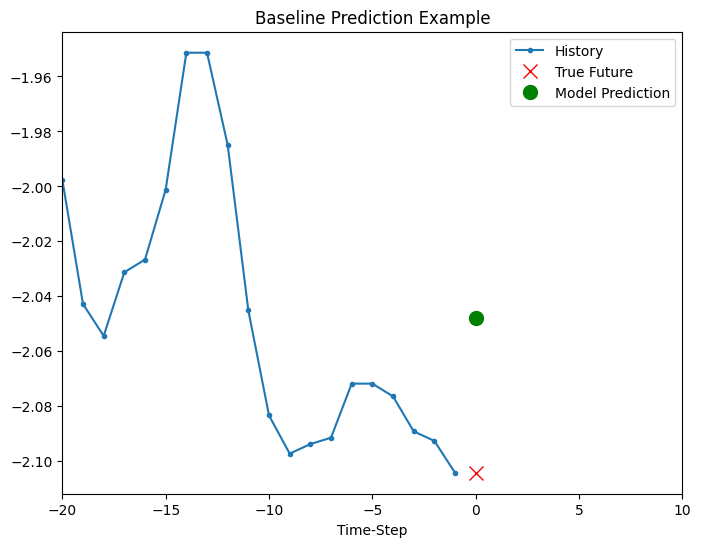

In [ ]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

Now the recurrent neural network comes into account

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [ ]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [ ]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

8/8 [==============================] - 1s 3ms/step
(256, 1)


In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 8s 16ms/step - loss: 0.3028 - val_loss: 0.0600
Epoch 2/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0664 - val_loss: 0.0291
Epoch 3/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0393 - val_loss: 0.0256
Epoch 4/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0375 - val_loss: 0.0219
Epoch 5/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0254 - val_loss: 0.0204
Epoch 6/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0276 - val_loss: 0.0199
Epoch 7/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0253 - val_loss: 0.0185
Epoch 8/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0238 - val_loss: 0.0179
Epoch 9/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0233 - val_loss: 0.0173
Epoch 10/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0213 - val_loss

8/8 [==============================] - 0s 3ms/step


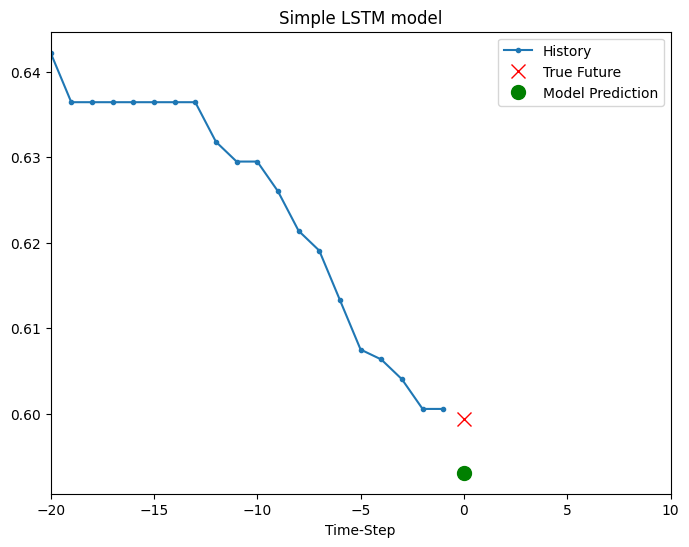

8/8 [==============================] - 0s 3ms/step


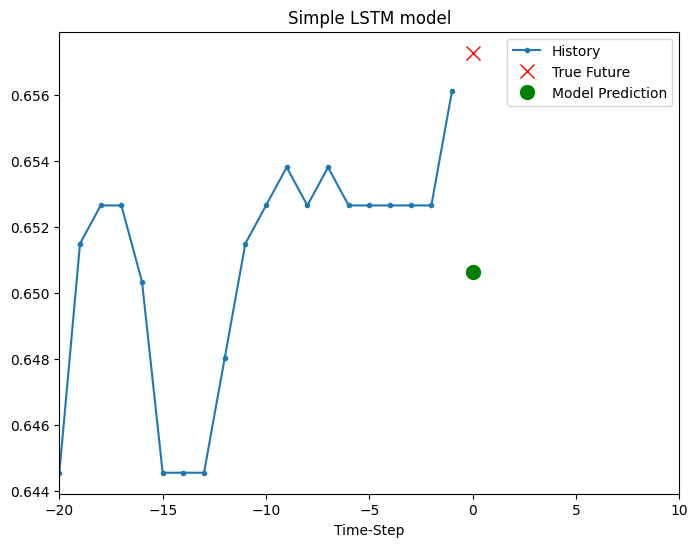

8/8 [==============================] - 0s 3ms/step


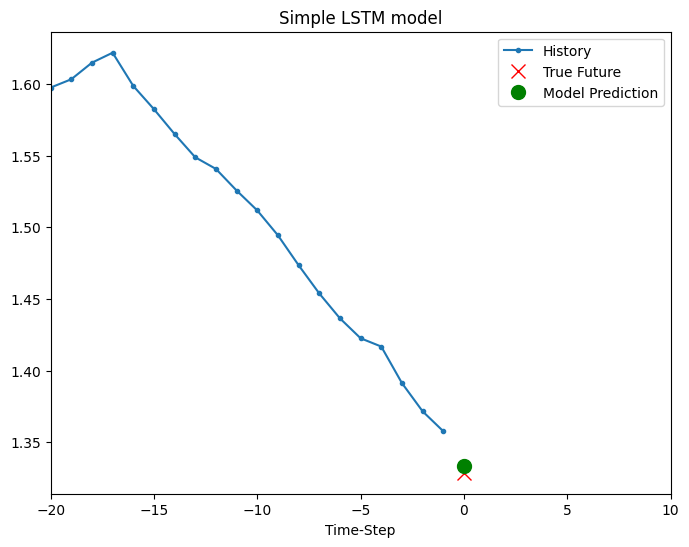

In [ ]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

- The above part handled the univariable, let's now move to the multivariable forecasting

In [ ]:
features_considered = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']

In [ ]:
features = df[features_considered]
features.index = df['Date Time']
features.head()

,p (mbar),T (degC),rho (g/m**3)
Date Time,,,
01.01.2009 00:10:00,996.52,-8.02,1307.75
01.01.2009 00:20:00,996.57,-8.41,1309.80
01.01.2009 00:30:00,996.53,-8.51,1310.24
01.01.2009 00:40:00,996.51,-8.31,1309.19
01.01.2009 00:50:00,996.51,-8.27,1309.00


array([<Axes: xlabel='Date Time'>, <Axes: xlabel='Date Time'>,
       <Axes: xlabel='Date Time'>], dtype=object)

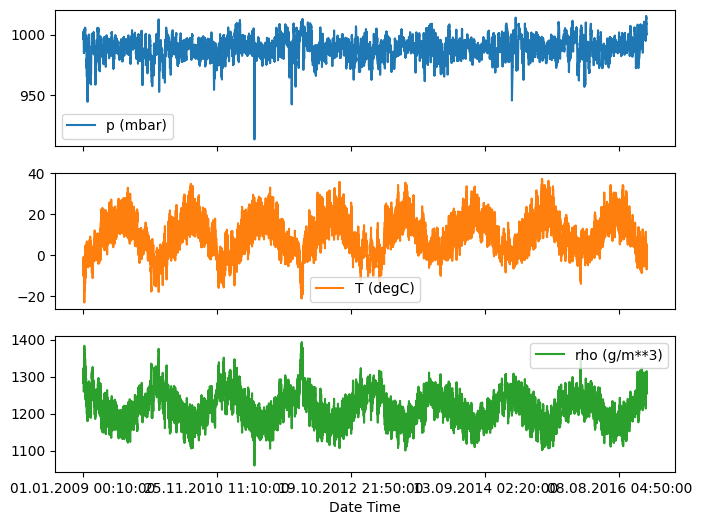

In [ ]:
features.plot(subplots=True)

The above shows how each of the features vary across the time

In [ ]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [ ]:
dataset = (dataset-data_mean)/data_std

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [ ]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))


Single window of past history : (120, 3)


In [ ]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [ ]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [ ]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

8/8 [==============================] - 0s 4ms/step
(256, 1)


In [ ]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 5s 12ms/step - loss: 0.3240 - val_loss: 0.2588
Epoch 2/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2660 - val_loss: 0.2375
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 0.2632 - val_loss: 0.2482
Epoch 4/10
200/200 [==============================] - 2s 8ms/step - loss: 0.2596 - val_loss: 0.2381
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.2287 - val_loss: 0.2361
Epoch 6/10
200/200 [==============================] - 2s 8ms/step - loss: 0.2415 - val_loss: 0.2616
Epoch 7/10
200/200 [==============================] - 2s 8ms/step - loss: 0.2436 - val_loss: 0.2705
Epoch 8/10
200/200 [==============================] - 2s 8ms/step - loss: 0.2446 - val_loss: 0.2581
Epoch 9/10
200/200 [==============================] - 2s 10ms/step - loss: 0.2455 - val_loss: 0.2384
Epoch 10/10
200/200 [==============================] - 2s 11ms/step - loss: 0.2392 - val_loss: 0.

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

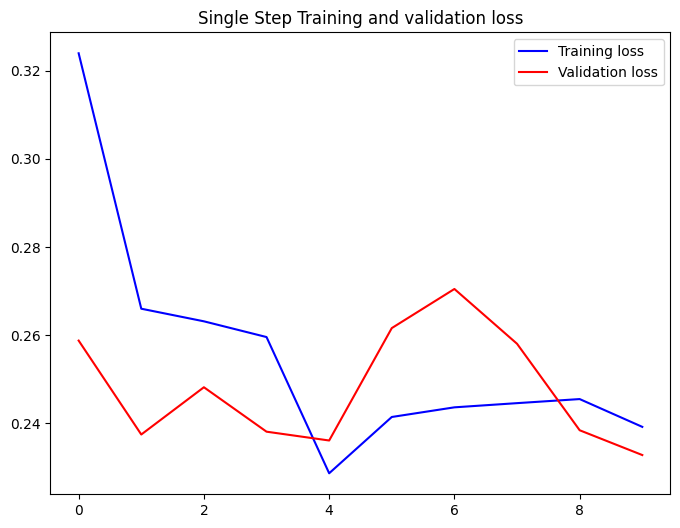

In [ ]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

- Predicting a single step feature


8/8 [==============================] - 0s 4ms/step


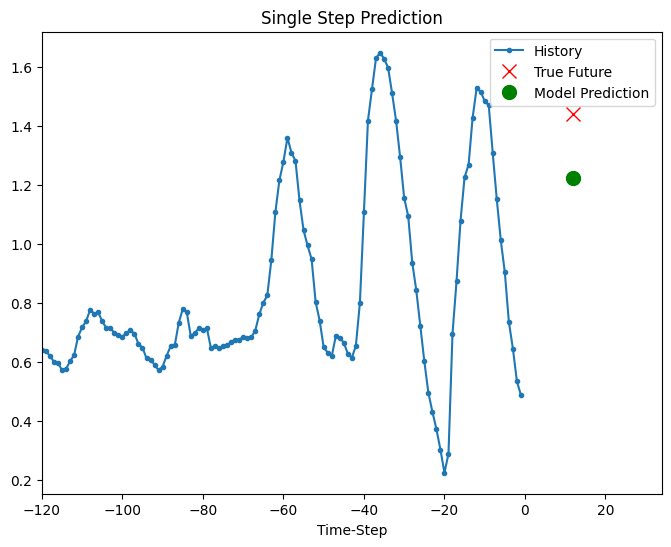

8/8 [==============================] - 0s 4ms/step


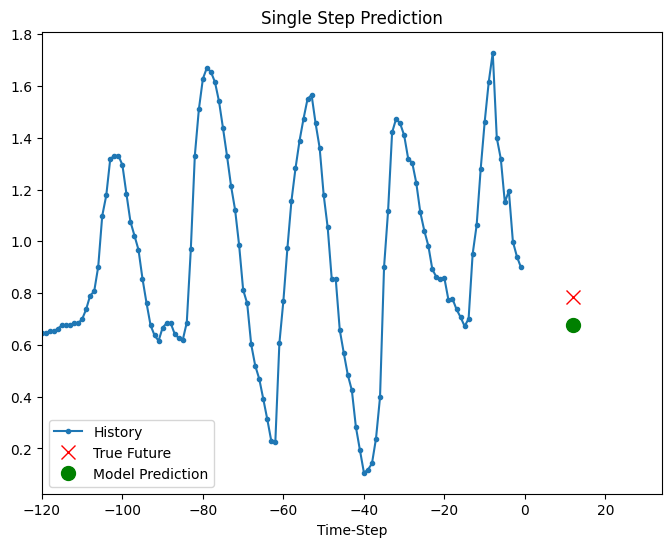

8/8 [==============================] - 0s 4ms/step


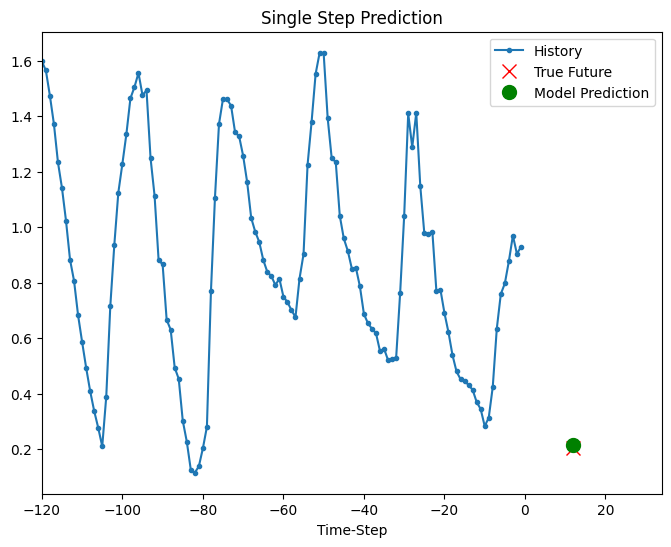

In [ ]:
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

- Multi -Step model


In [ ]:
future_target = 72
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [ ]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 3)

 Target temperature to predict : (72,)


In [ ]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [ ]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

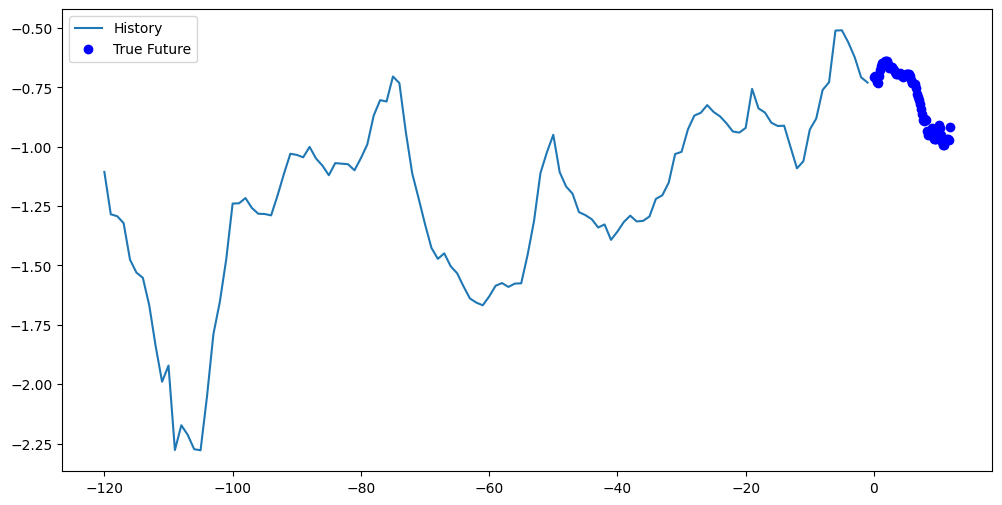

In [ ]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

In [ ]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [ ]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

8/8 [==============================] - 1s 21ms/step
(256, 72)


In [ ]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 52s 244ms/step - loss: 31.7636 - val_loss: 0.3595
Epoch 2/10
200/200 [==============================] - 47s 236ms/step - loss: 0.3839 - val_loss: 0.2867
Epoch 3/10
200/200 [==============================] - 64s 322ms/step - loss: 0.3711 - val_loss: 0.2883
Epoch 4/10
200/200 [==============================] - 47s 237ms/step - loss: 0.2917 - val_loss: 0.2377
Epoch 5/10
200/200 [==============================] - 49s 243ms/step - loss: 0.2144 - val_loss: 0.2208
Epoch 6/10
200/200 [==============================] - 47s 236ms/step - loss: 0.2171 - val_loss: 0.2199
Epoch 7/10
200/200 [==============================] - 47s 236ms/step - loss: 0.2072 - val_loss: 0.2057
Epoch 8/10
200/200 [==============================] - 48s 237ms/step - loss: 0.2020 - val_loss: 0.1945
Epoch 9/10
200/200 [==============================] - 47s 238ms/step - loss: 0.2026 - val_loss: 0.2023
Epoch 10/10
200/200 [==============================] - 47s 236ms/step - 

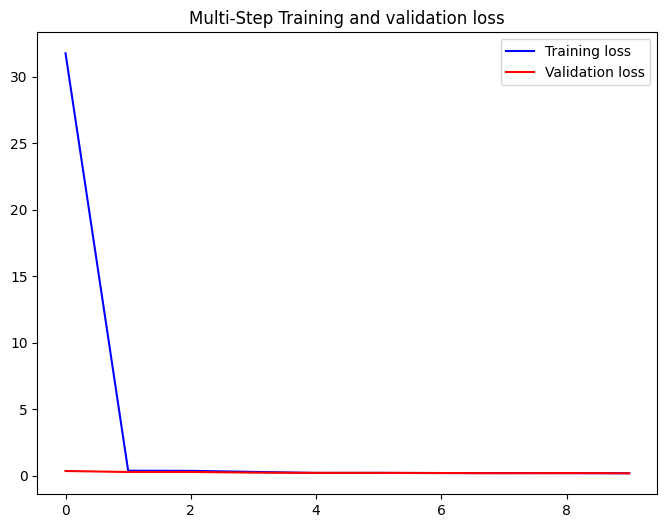

In [ ]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')


- Predicting a multi-step feature


8/8 [==============================] - 0s 20ms/step


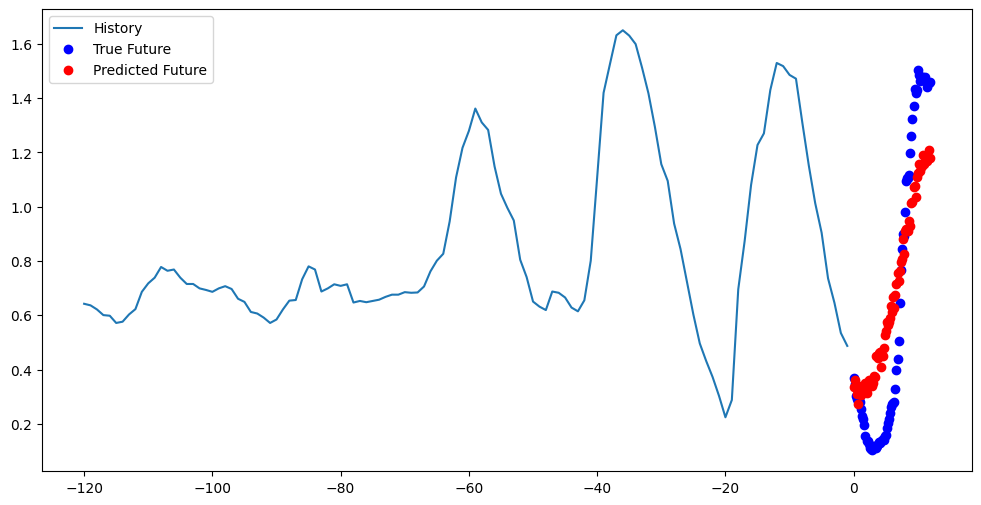

8/8 [==============================] - 0s 19ms/step


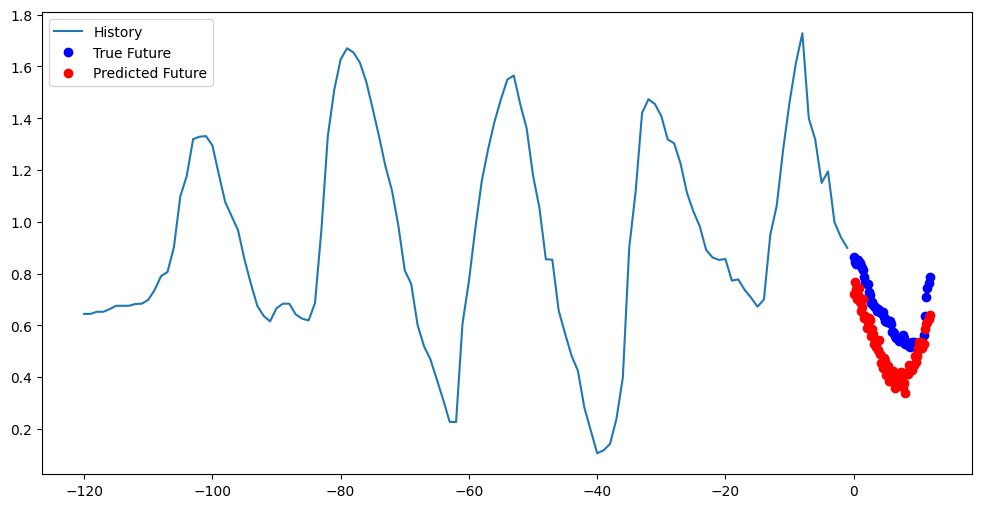

8/8 [==============================] - 0s 22ms/step


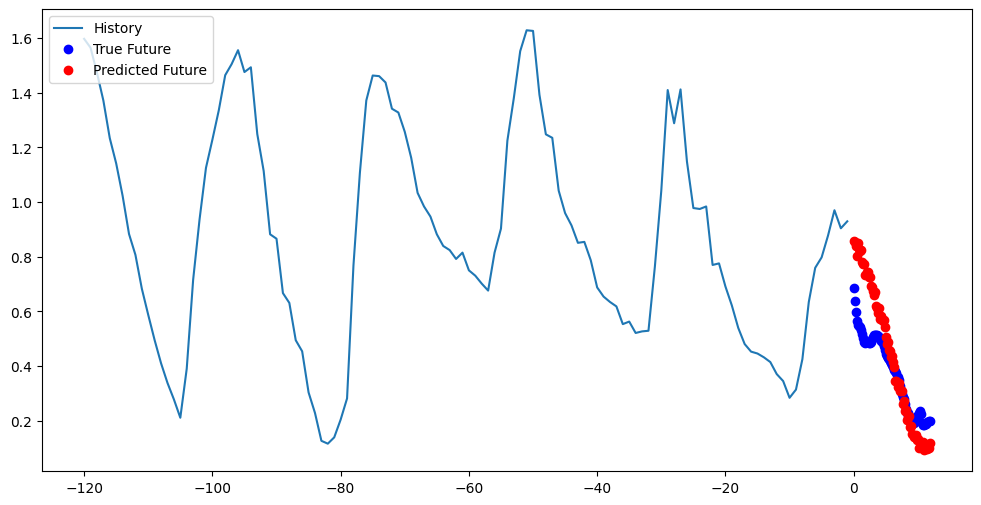

In [ ]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

Like we stated above, this was quick introduction to time series forecasting using an RNN



### **`[Problem 3] Learning Iris (binary classification) with Keras`**

---



In [ ]:
import numpy as np
import pandas as pd
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam # - Works

df = pd.read_csv("Iris.csv")

df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

<ipython-input-50-8f6831ba62b2>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)[:, np.newaxis]


In [ ]:
K.clear_session( )

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

Epoch 1/10
7/7 [==============================] - 2s 31ms/step - loss: 0.9770 - accuracy: 0.5781 - val_loss: 0.5748 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 0s 12ms/step - loss: 0.5240 - accuracy: 0.7969 - val_loss: 0.3938 - val_accuracy: 0.9375
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3676 - accuracy: 0.9219 - val_loss: 0.3259 - val_accuracy: 0.9375
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2788 - accuracy: 0.9219 - val_loss: 0.1802 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3258 - accuracy: 0.8438 - val_loss: 0.1820 - val_accuracy: 0.8750
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.1627 - accuracy: 0.9531 - val_loss: 0.1438 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.1404 - accuracy: 0.9375 - val_loss: 0.1222 - val_accuracy: 1.0000
Epoch 8/10
7/7 [==============

In [ ]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())
     

1/1 [==============================] - 0s 51ms/step
y_pred_proba [0.05519852 0.99914145 0.04262814 0.99959916 0.96768427 0.9992735
 0.4789745  0.9232532  0.99952054 0.9909018  0.996518   0.997556
 0.9992157  0.24770503 0.00625299 0.01945907 0.7892458  0.00610474
 0.9701524  0.01502178]
y_pred [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]
y_test [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.31419238448143005
Train accuracy: 0.8999999761581421


### **`[Problem 4] Learn Iris (multi-level classification) with Keras`**

---



In [ ]:
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("Iris.csv")

y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int64)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train)
y_val_one_hot = enc.transform(y_val)
y_test_one_hot = enc.transform(y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
K.clear_session( )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(3, activation = tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_one_hot,
                    batch_size=10,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_val, y_val_one_hot))

In [ ]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

1/1 [==============================] - 0s 76ms/step
y_pred_proba [8.6986203e-11 2.1191181e-03 9.9978226e-01 7.6871226e-10 9.9827945e-01
 8.6824010e-13 9.9910861e-01 2.2817923e-04 1.7373261e-04 1.9613397e-03
 8.4482084e-09 3.5438134e-04 1.5761126e-04 1.7306805e-04 8.9901660e-05
 9.9741900e-01 1.2545096e-04 1.4209765e-04 9.9691999e-01 9.9964857e-01
 4.3538955e-09 5.8766444e-05 9.9183476e-01 9.9471480e-01 5.2573350e-06
 9.9957186e-01 9.9556607e-01 7.6996500e-04 7.9322895e-03 9.9692291e-01]
y_pred [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

1/1 [==============================] - 0s 27ms/step
y_pred [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [ ]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.031853996217250824
Train accuracy: 1.0


### **`[Problem 5] Learning House Prices with Keras`**

---



In [ ]:
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('train.csv')

x = train[['GrLivArea', 'YearBuilt']]
y = train[['SalePrice']]

x = np.log(x).values
y = np.log(y).values

sc = StandardScaler()
sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
K.clear_session( )

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(2,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

In [ ]:
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(loss='mse',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['mse'])
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=20,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))
     

Epoch 1/20
94/94 [==============================] - 2s 5ms/step - loss: 2.9456 - mse: 2.9456 - val_loss: 0.0772 - val_mse: 0.0772
Epoch 2/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0826 - mse: 0.0826 - val_loss: 0.1034 - val_mse: 0.1034
Epoch 3/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.0965 - val_mse: 0.0965
Epoch 4/20
94/94 [==============================] - 0s 4ms/step - loss: 0.1098 - mse: 0.1098 - val_loss: 0.0870 - val_mse: 0.0870
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0985 - mse: 0.0985 - val_loss: 0.0730 - val_mse: 0.0730
Epoch 6/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0937 - mse: 0.0937 - val_loss: 0.0713 - val_mse: 0.0713
Epoch 7/20
94/94 [==============================] - 0s 4ms/step - loss: 0.1025 - mse: 0.1025 - val_loss: 0.0725 - val_mse: 0.0725


In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba
print("y_pred", y_pred.ravel()[:5])
print('y_test', y_test.ravel()[:5])

10/10 [==============================] - 0s 2ms/step
y_pred [12.405431 12.016504 11.801484 12.234996 11.734297]
y_test [12.20918779 11.79810441 11.60823564 12.16525065 11.38509209]


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('loss (test):', score[0])
print('Mean Squared Error (test):', score[1])

loss (test): 0.07598210871219635
Mean Squared Error (test): 0.07598210871219635


### **`[Problem 6] Learning MNIST with Keras`**

---



In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255
X_test /= 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
K.clear_session( )

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot,
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_val, y_val_one_hot))

Epoch 1/5
2400/2400 [==============================] - 10s 4ms/step - loss: 0.2969 - accuracy: 0.9127 - val_loss: 0.2310 - val_accuracy: 0.9359
Epoch 2/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1928 - accuracy: 0.9435 - val_loss: 0.2052 - val_accuracy: 0.9384
Epoch 3/5
2400/2400 [==============================] - 8s 3ms/step - loss: 0.1622 - accuracy: 0.9521 - val_loss: 0.1929 - val_accuracy: 0.9477
Epoch 4/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1429 - accuracy: 0.9587 - val_loss: 0.1635 - val_accuracy: 0.9553
Epoch 5/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1303 - accuracy: 0.9625 - val_loss: 0.1661 - val_accuracy: 0.9563


In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred[:10])
print('y_test', y_test.ravel()[:10])

313/313 [==============================] - 1s 2ms/step
y_pred [7 2 1 0 4 1 4 9 5 9]
y_test [7 2 1 0 4 1 4 9 5 9]


In [ ]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.149349644780159
Test accuracy: 0.9574000239372253


### **`[Problem 7] (Advance assignment) Rewriting to PyTorch`**

---



In [ ]:
#import data
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

The torchvision.datasets module contains Dataset objects for many real-world vision data like CIFAR, COCO (full list here). In this tutorial, we use the FashionMNIST dataset. Every TorchVision Dataset includes two arguments: transform and target_transform to modify the samples and labels respectively.

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


**Creating Models**

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


**Optimizing the Model Parameters**

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In a single learning loop, the model makes predictions on the training dataset (which is provided to it in batches), and back-propagates the prediction error to adjust the model parameters.

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the performance of the model against the test data set to ensure that it is learning well.

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The learning process takes place over several iterations (epochs). During each epoch, the model learns parameters to make better predictions. We print the accuracy and loss of the model at each epoch; we would like to see the accuracy increase and the loss decrease at each epoch.

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297996  [    0/60000]
loss: 2.284944  [ 6400/60000]
loss: 2.268372  [12800/60000]
loss: 2.269138  [19200/60000]
loss: 2.251630  [25600/60000]
loss: 2.213868  [32000/60000]
loss: 2.222967  [38400/60000]
loss: 2.186550  [44800/60000]
loss: 2.184855  [51200/60000]
loss: 2.153259  [57600/60000]
Test Error: 
 Accuracy: 53.8%, Avg loss: 2.148678 

Epoch 2
-------------------------------
loss: 2.157429  [    0/60000]
loss: 2.151020  [ 6400/60000]
loss: 2.091474  [12800/60000]
loss: 2.108047  [19200/60000]
loss: 2.068632  [25600/60000]
loss: 1.991810  [32000/60000]
loss: 2.024007  [38400/60000]
loss: 1.942472  [44800/60000]
loss: 1.949064  [51200/60000]
loss: 1.874897  [57600/60000]
Test Error: 
 Accuracy: 57.3%, Avg loss: 1.873739 

Epoch 3
-------------------------------
loss: 1.909791  [    0/60000]
loss: 1.884937  [ 6400/60000]
loss: 1.758328  [12800/60000]
loss: 1.801113  [19200/60000]
loss: 1.706614  [25600/60000]
loss: 1.641711  [32000/600

**Saving Models**

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


**Loading Models**

In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


### **`[Problem 8] (Advance assignment) Comparison of frameworks`**

---



**TensorFlow** is a very powerful and mature deep learning library with strong visualisation capabilities and several options to use for high-level model development. It has production-ready deployment options and supports mobile platforms. TensorFlow is a good option if you :

- Develop models for production use.
- Develop models that are to be deployed on mobile platforms
- Want good community support and comprehensive documentation
- Want rich learning resources in a variety of formats (TensorFlow has a comprehensive MOOC)
- Want or need to use Tensorboard
- Need to use large-scale distributed model building



---
**PyTorch** is a fully featured framework for building deep learning models, which is a type of machine learning that’s commonly used in applications like image recognition and language processing. Written in Python, it’s relatively easy for most machine learning developers to learn and use. PyTorch is distinctive for its excellent support for GPUs and its use of reverse-mode auto-differentiation, which enables computation graphs to be modified on the fly. This makes it a popular choice for fast experimentation and prototyping.

**Why PyTorch?**

PyTorch is the work of developers at Facebook AI Research and several other labs. The framework combines the efficient and flexible GPU-accelerated backend libraries from Torch with an intuitive Python frontend that focuses on rapid prototyping, readable code, and support for the widest possible variety of deep learning models. Pytorch lets developers use the familiar imperative programming approach, but still output to graphs.  It was released to open source in 2017, and its Python roots have made it a favorite with machine learning developers.

**PyTorch** is still a young framework that is growing rapidly. It may be suitable for you if you:

- You are doing research or the non-functional requirements of your production are not very high
- You want a better development and debugging experience
- You like all things Python

